In [1]:
import scipy.stats
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


**Descriptive Statistics**

Statistics Summary of The DataSet

In [3]:
#Info of the Data

boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


In [4]:
#Statistics of the Data

boston_df.describe(include = 'all')

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [6]:
#List the column 

boston_df.columns

Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

For the "Median value of owner-occupied homes" provide a boxplot

[Text(0, 0.5, 'Median value of owner-occupied homes'),
 Text(0.5, 0, 'Boxplot'),
 Text(0.5, 1.0, 'Boxplot for Median value of owner-occupied homes')]

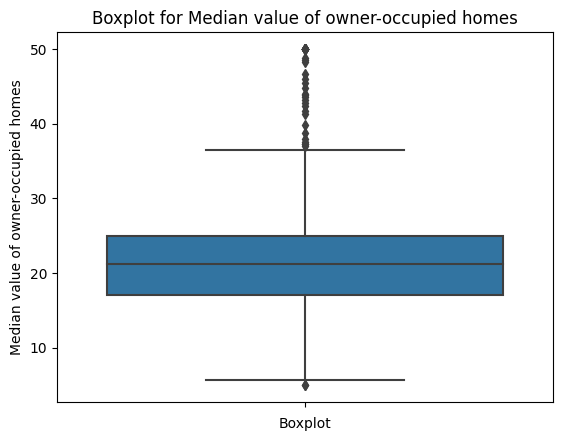

In [7]:
box = sns.boxplot(y= 'MEDV', data=boston_df)
box.set(ylabel = "Median value of owner-occupied homes",
        xlabel = 'Boxplot',
        title = 'Boxplot for Median value of owner-occupied homes')

EXPLANATION - The Boxplot shown here corresponds to Median value of owner-occupied homes and we can see that there are various outliers below the first quartile. The Median as per the BoxPlot is shown in the plot as approximately 21 or 22.

**Task_3**
Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

[Text(0.5, 0, 'The AGE variable'),
 Text(0, 0.5, 'The MEDV variable'),
 Text(0.5, 1.0, 'Boxplot for the MEDV variable vs the AGE variable')]

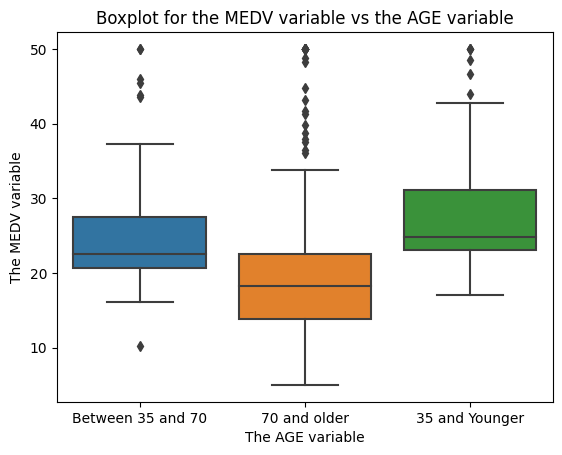

In [9]:
#Divide age into 3 Groups

boston_df.loc[boston_df['AGE'] <= 35, 'Age_Group'] = '35 and Younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'Age_Group'] = 'Between 35 and 70'
boston_df.loc[boston_df['AGE'] >= 70, 'Age_Group'] = '70 and older'

boxplot = sns.boxplot(x = 'Age_Group', y = 'MEDV', data=boston_df)
boxplot.set(xlabel='The AGE variable',
            ylabel = 'The MEDV variable',
            title = 'Boxplot for the MEDV variable vs the AGE variable')

SOLUTION  - The Boxplot corresponds to the various groups in the AGE column and there are three groups which are 35 years and younger, Between 35 and 70 years and 70 years and older. The Median for the group "35 years and younger" is approximately 25, for "70 years and older" the Median is approximately 19 and for "Between 35 and 70 years" group the Median is approximately 22.

**Task 4** :Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

[Text(0, 0.5, 'Nitric Oxides concentration'),
 Text(0.5, 0, 'Proportion of non-retail business acres per town.'),
 Text(0.5, 1.0, 'Scatter Plot between NOX and INDUS')]

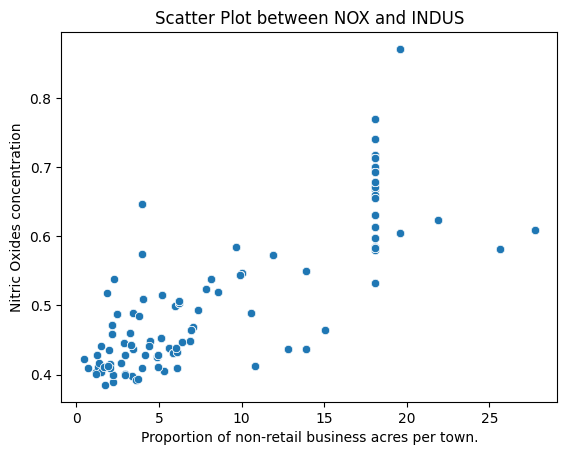

In [10]:
# ScatterPlot for correlation between the INDUS and NOX column.

scatter = sns.scatterplot(x = 'INDUS', y = 'NOX', data = boston_df)
scatter.set(ylabel = "Nitric Oxides concentration"
            , xlabel = "Proportion of non-retail business acres per town."
           , title = "Scatter Plot between NOX and INDUS")

SOLUTION - The Scatter Plot shows that there is a high correlation or positive correlation between the Nitric Oxides concentration (parts per 10 million) and Proportion of non-retail business acres per town as there is a near linear relationship between both of them.

**Task_5** :Create a histogram for the pupil to teacher ratio variable

<ipython-input-11-177a2d2c0fe6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  histplot = sns.distplot(boston_df['PTRATIO'])


[Text(0.5, 0, 'Pupil-Teacher ratio by town'),
 Text(0, 0.5, 'Frequency of Pupil-Teacher ratio by town'),
 Text(0.5, 1.0, 'Histogram for the pupil to teacher ratio variable')]

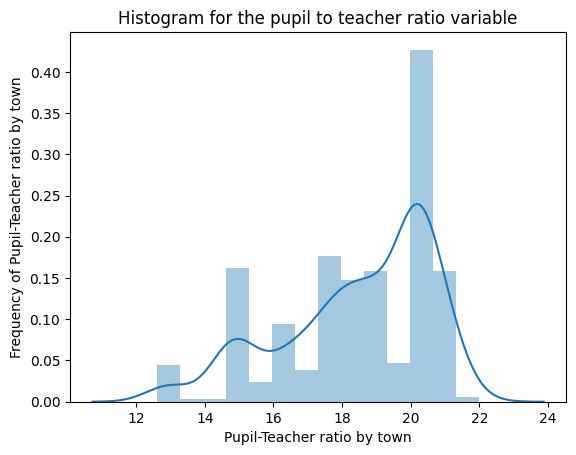

In [11]:
# Display a Histogram for the PTRATIO column.

histplot = sns.distplot(boston_df['PTRATIO'])
histplot.set(xlabel = "Pupil-Teacher ratio by town"
             , ylabel = "Frequency of Pupil-Teacher ratio by town"
            , title = "Histogram for the pupil to teacher ratio variable")

Solution - The Histogram mentioned above corresponds to the Frequency Distribution of Pupil-Teacher ratio by town. The highest corresponds to the 20 - 22 bin group. We can also see that the distribution is skewed to the left as the tail of the histogram is towards the 12 on the x-axis. This is called as the Negative-skewed Distribution.

**Use the appropriate tests to answer the questions provided.**

**Question No : 1**

Is there a significant difference in median value of houses bounded by the Charles river or not? **(T-test for independent samples)**

**Soln**

ASSUMPTIONS -

We will be using the t-test for independent samples. For the independent t-test, the following assumptions must be met.

1.One independent, categorical variable with two levels or group
One dependent continuous variable
Independence of the observations. 
2.Each subject should belong to only one group. 3.There is no relationship between the observations in each group.
4.The dependent variable must follow a normal distribution
5.Assumption of homogeneity of variance


State the hypothesis

1.   H0:µ1=µ2
  ("there is no difference in median value of houses bounded by the Charles river")
2.   H1:µ1≠µ2
  ("there is a difference in median value of houses bounded by the Charles river")



In [12]:
#USE LEVENE'S TEST

scipy.stats.levene(boston_df['MEDV'],boston_df['CHAS'],center = 'mean')

LeveneResult(statistic=532.6811164157666, pvalue=5.402535119732986e-95)

In [13]:
#For Additional Proof use ttest_ind function

scipy.stats.ttest_ind(boston_df['MEDV'],boston_df["CHAS"])

Ttest_indResult(statistic=54.9210289745203, pvalue=1.4651540072350996e-305)

CONCLUSION: Since the p-value is less than alpha value 0.05, we reject the null hypothesis.So Take There is a difference in median value of houses bounded by the Charles river.

**ANOVA: Using the Boston Housing data set, Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)**

Soln : First, we group the data into categories as the one-way ANOVA can't work with continuous variable.


1.  35 years and younger 
1.  Between 35 and 70 years
2.  70 years and older

In [17]:
#First, we group the data into categories as the one-way ANOVA can't work with continuous variable.

boston_df.loc[boston_df['AGE'] <= 30, 'Age_Group'] = "35 and younger"
boston_df.loc[(boston_df['AGE'] > 30) & (boston_df['AGE'] < 70), 'Age_Group'] = "Between 35 and 70"
boston_df.loc[(boston_df['AGE'] >= 70), 'Age_Group'] = "70 and older"

State Hypothesis

1. Ho : Three Population means are Equal
2. H1 : At least one of the means are differ



In [18]:
#Levene'S Test
scipy.stats.levene(boston_df[boston_df['Age_Group'] == "35 and younger"]['MEDV'],
                   boston_df[boston_df['Age_Group'] == "Between 35 and 70"]['MEDV'], 
                   boston_df[boston_df['Age_Group'] == "70 and older"]['MEDV'], 
                   center='mean')

LeveneResult(statistic=1.9263167703439634, pvalue=0.14675700390882251)

In [19]:
#ANAVO onewayTest
#First, separate the three samples (one for each category) into a variable each.

first = boston_df[boston_df['Age_Group'] == "35 and younger"]['MEDV']
middle = boston_df[boston_df['Age_Group'] == "Between 35 and 70"]['MEDV']
last = boston_df[boston_df['Age_Group'] == "70 and older"]['MEDV']

scipy.stats.f_oneway(first,middle,last)

F_onewayResult(statistic=34.249179272635395, pvalue=1.135217093487225e-14)

CONCLUSION: Since the p-value is less than alpha value 0.05, we reject the null hypothesis.

**Question No ; 3**

Correlation: Using the Boston Housing dataset, Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?


**Soln :**

State the Hypothesis

* H0:
  There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.
* H1:
  There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.



In [20]:
#Pearson Correlation

scipy.stats.pearsonr(boston_df['NOX'],boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209151, pvalue=7.913361061239527e-98)

CONCLUSION: Since the p-value is less than 0.05, we reject the Null hypothesis

**Question ; 4**

What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Soln :

State the Hypothesis

1. H0 ;  β1
  = 0 -There is no impact
2. H1 ; β1
  != 0 There is an impact



In [21]:
# X is input Variable Independent VAriable

X = boston_df['DIS']

#Y is Dependent Variable/Target Variable

Y = boston_df['MEDV']

# add an intercept (beta_0) to our model

X = sm.add_constant(X)

# Create Model

model = sm.OLS(Y, X).fit()
prediction = model.predict(X)

# Print out the statistics

model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 08 May 2023   Prob (F-statistic):           1.21e-08
Time:                        17:41:59   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

CONCLUSION: Like the t-test, the p-value is less than the alpha (α) level = 0.05, so we reject the null hypothesis